1.Take a dataset of your own interest consisting of multiple classes  

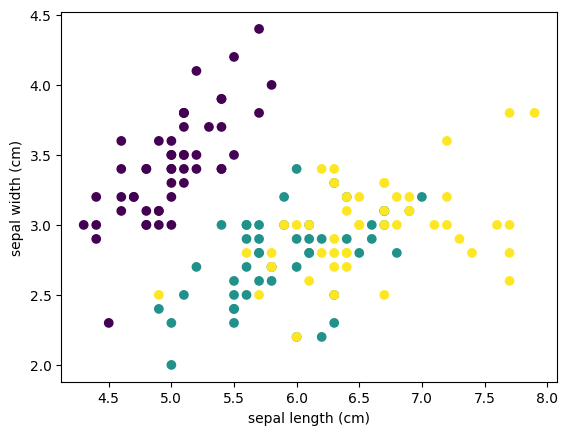

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Load the Iris dataset
data = load_iris()
df=pd.DataFrame(data.data, columns=data.feature_names)
df.head()

# plot the data
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=data.target)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

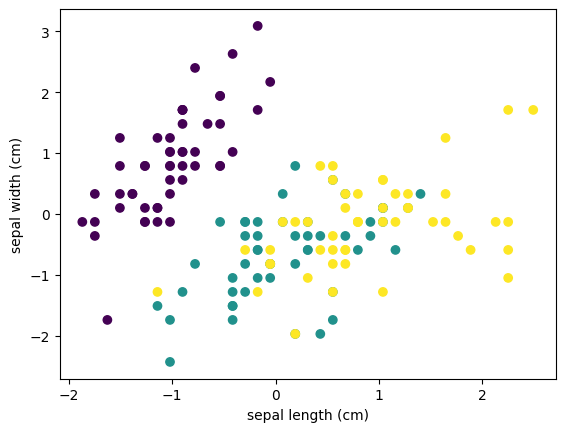

In [ ]:
# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)
scaled_data = pd.DataFrame(scaled_data, columns=df.columns)
scaled_data.head()

# plot the data
plt.scatter(scaled_data['sepal length (cm)'], scaled_data['sepal width (cm)'], c=data.target)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

2.From the dataset, define your training set, target variable, test set, and splitting.
$The SVC() function can be used to fit a support vector classifier when the argument kernel="linear" is used.  We will use SVC() function from sklearn.svm.SVC library to create our classifier model using fit() method on the training data set.
#Support vector classifier
cls = SVC().fit(X_train, y_train)

4.Report the classification accuracy:
accuracy_score(target_actual_value,target_predicted_value)

In [ ]:
X = scaled_data
y = data.target

# Define training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svc_linear = SVC(kernel='linear', probability=True)
svc_linear.fit(X_train, y_train)

y_pred_linear = svc_linear.predict(X_test)

# Report the classification accuracy
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print("Accuracy with linear kernel:", accuracy_linear)


Accuracy with linear kernel: 0.9666666666666667


5.Experiments: (i) Report the performance of the SVC comparing linear kernel, polynomial kernel, Radial basis function kernel, and sigmoid function (ii) Draw the ROC for only linear and polynomial kernel (iii) Plot the confusion matrix for which you got the highest accuracy (iii) Identify hyper parameter of SVC and show the effect of hyper parameter on your dataset.


In [ ]:
# (i) Compare different kernel types
kernel_types = ['linear', 'poly', 'rbf', 'sigmoid']
accuracies = []

for kernel_type in kernel_types:
    svc = SVC(kernel=kernel_type)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Accuracy with {kernel_type} kernel: {accuracy}")

Accuracy with linear kernel: 0.9666666666666667
Accuracy with poly kernel: 0.9666666666666667
Accuracy with rbf kernel: 1.0
Accuracy with sigmoid kernel: 0.9


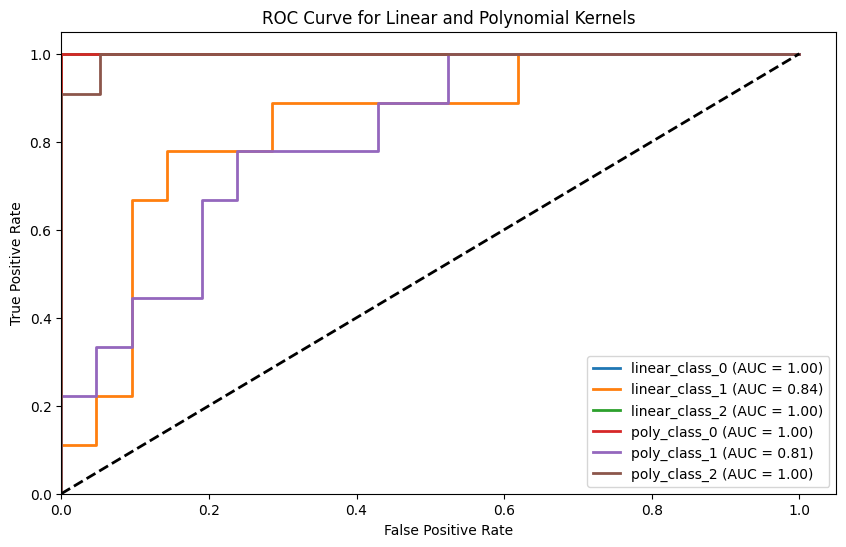

In [ ]:
# Binarize the target variables for one-vs-all classification
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

kernels = ['linear', 'poly']

roc_curves = {}

# Iterate through each kernel and class
for kernel in kernels:
    for i in range(n_classes):

        cls = OneVsRestClassifier(SVC(kernel=kernel, probability=True))


        cls.fit(X_train, y_train[:, i])


        y_score = cls.predict_proba(X_test)[:, 1]


        fpr, tpr, _ = roc_curve(y_test[:, i], y_score)
        roc_auc = auc(fpr, tpr)

        y
        roc_curves[f'{kernel}_class_{i}'] = (fpr, tpr, roc_auc)

# Plot ROC curves for linear and polynomial kernels
plt.figure(figsize=(10, 6))
for kernel in kernels:
    for i in range(n_classes):
        fpr, tpr, roc_auc = roc_curves[f'{kernel}_class_{i}']
        plt.plot(fpr, tpr, lw=2, label=f'{kernel}_class_{i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Linear and Polynomial Kernels')
plt.legend(loc="lower right")
plt.show()

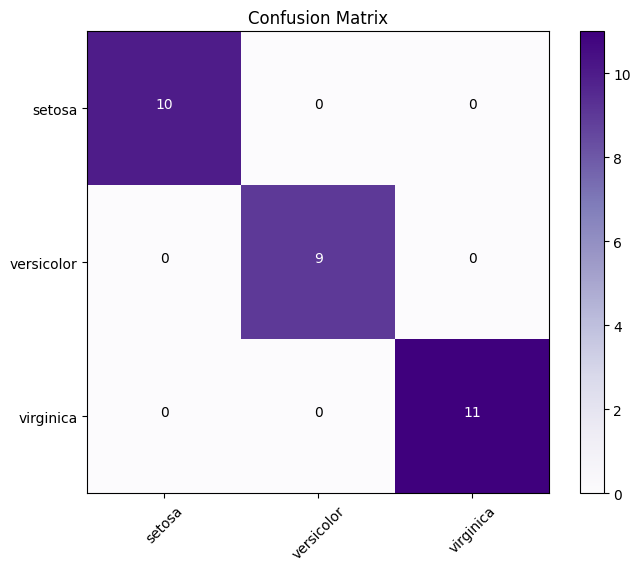

In [ ]:
from sklearn.metrics import confusion_matrix
from itertools import product

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Define training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


kernel_types = ['linear', 'poly', 'rbf', 'sigmoid']
accuracies_dict = {}

for kernel_type in kernel_types:
    svc = SVC(kernel=kernel_type)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_dict[kernel_type] = accuracy

# Determine the kernel with the highest accuracy
best_kernel = max(accuracies_dict, key=accuracies_dict.get)

# Create an SVC classifier with the best kernel
svc = SVC(kernel=best_kernel)
svc.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best = svc.predict(X_test)

# Generate the confusion matrix
confusion_best = confusion_matrix(y_test, y_pred_best)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(confusion_best, interpolation='nearest', cmap=plt.get_cmap('Purples'))
plt.title('Confusion Matrix')
plt.colorbar()

# Labeling the axes
classes = data.target_names
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Annotate with the counts in each cell
thresh = confusion_best.max() / 2.
for i, j in product(range(confusion_best.shape[0]), range(confusion_best.shape[1])):
    plt.text(j, i, confusion_best[i, j], horizontalalignment="center", color="white" if confusion_best[i, j] > thresh else "black")


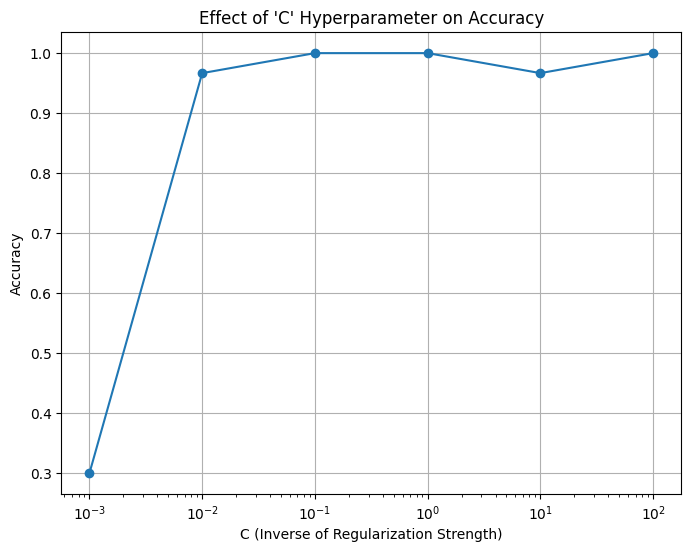

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Visualize the effect of the 'C' hyperparameter
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
accuracies = []

for C in C_values:
    svc = SVC(kernel=best_kernel, C=C)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.figure(figsize=(8, 6))
plt.semilogx(C_values, accuracies, marker='o')
plt.title("Effect of 'C' Hyperparameter on Accuracy")
plt.xlabel("C (Inverse of Regularization Strength)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()